### 시그모이드 함수(sigmoid function)

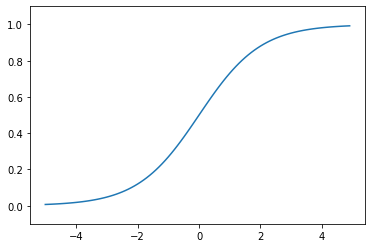

In [10]:
import numpy as np
import matplotlib.pylab as plt

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
#브로드캐스트
#넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

### 계단함수(step function)

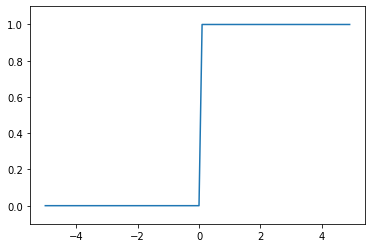

In [11]:
import numpy as np
import matplotlib.pylab as plt
        
def step_function(x):
    return np.array(x>0, dtype=np.int)
    ##numpy 배열을 인수로 넣을 수 있게 하는 방법
    #x = np.array([-1.0, 1.0, 2.0])
    #y = x>0
    #y를 출력하면 0보다 큰 x값은 True로, 0보다 작거나 같은 값은 False로 나온다.
    #booleaan값을 int형으로 변환시키면 True는 0, False는 1이다.
        
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) 
plt.show()

### ReLU함수

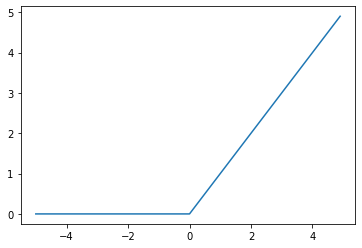

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y= relu(x)
plt.plot(x, y)
plt.show()

### 다차원 배열의 계산

In [14]:
import numpy as np

#1차원 배열
A = np.array([1,2,3,4])
np.ndim(A)
A.shape #튜플로 반환

(4,)

In [15]:
#2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
np.ndim(B)
B.shape            

(3, 2)

### 행렬의 곱

In [19]:
A = np.array([[1,2], [3,4]]) #2*2행렬
B = np.array([[5,6], [7,8]]) #2*2행렬
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [20]:
A = np.array([[1,2,3], [4,5,6]]) #2*3행렬
A.shape

B = np.array([[1,2], [3,4], [5,6]]) #3*2행렬
B.shape

np.dot(A, B)

array([[22, 28],
       [49, 64]])

### 신경망에서의 행렬 곱

In [21]:
X = np.array([1,2])
X.shape #(2,)

W = np.array([[1,3,5], [2,4,6]])
print(W)
W.shape #(2,3)

Y = np.dot(X, W)
print(Y)

[[1 3 5]
 [2 4 6]]
[ 5 11 17]


### 3층 신경망 구현 정리

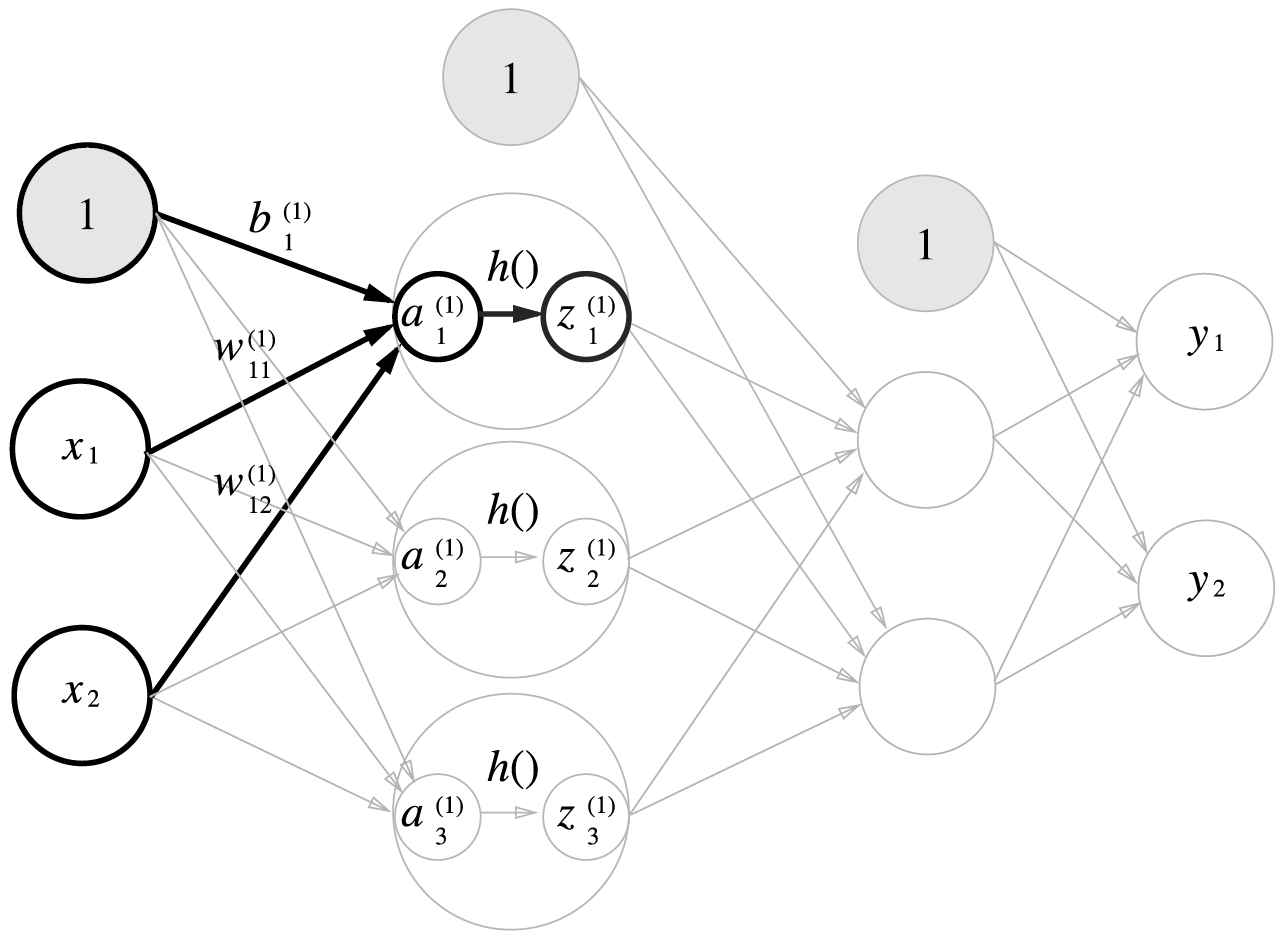

In [41]:
from IPython.display import Image
Image(filename='../equations_and_figures/deep_learning_images/fig 3-18.png')

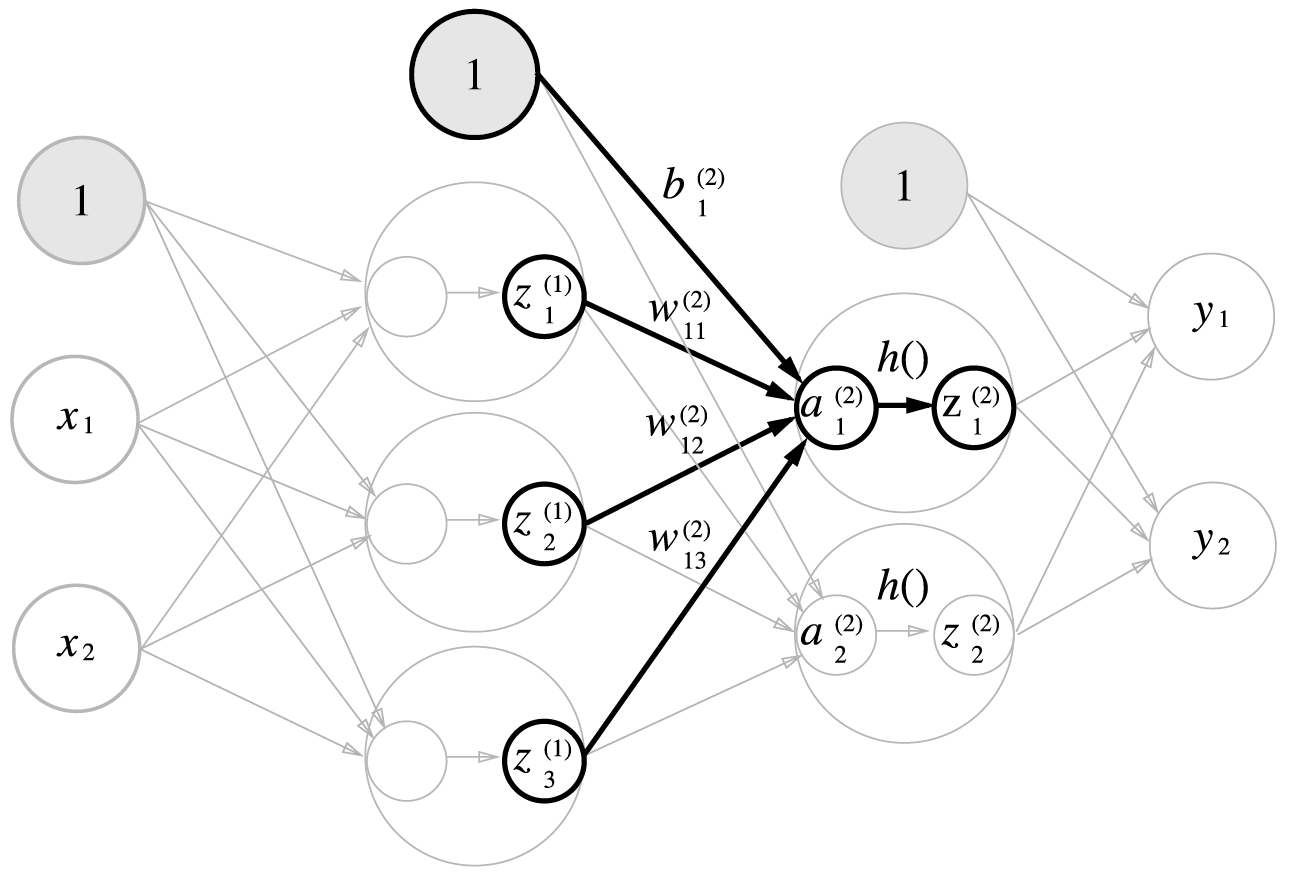

In [42]:
Image(filename='../equations_and_figures/deep_learning_images/fig 3-19.png')

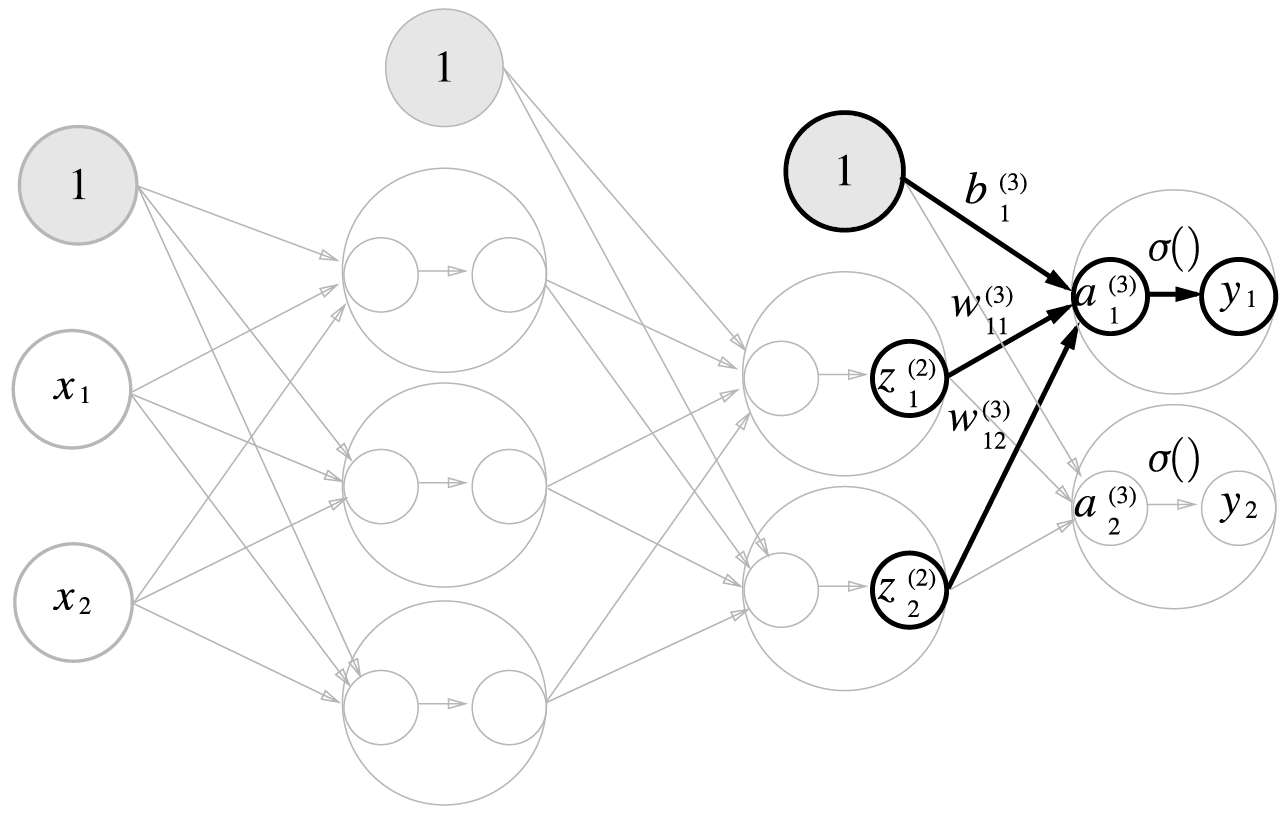

In [43]:
Image(filename='../equations_and_figures/deep_learning_images/fig 3-20.png')

In [28]:
def identity_function(x):
    return x

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]]) #2*3
    network['b1'] = np.array([0.1, 0.2, 0.3]) #1*3
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]]) #3*2
    network['b2'] = np.array([0.1, 0.2]) #1*2
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) #2*2
    network['b3'] = np.array([0.1, 0.2]) #1*2
  
    return network

#신호가 순방향(입력에서 출력 방향)으로 전달됨(순전파)임을 알리기 위함이다.
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0, 0.5]) #1*2
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


In [45]:
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np
from PIL import Image



def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    #Image.fromarray: 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
#flatten=True는 1차원 넘파이 배열로 저장되어 있다
#이미지를 표시할 때 원래 형상인 28*28크기로 다시 변형해야
print(img.shape)
img_show(img)

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

5
(784,)
(28, 28)


In [6]:
import numpy as np
import pickle
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    #sample_weight.pkl파일에 저장된 학습된 가중치 매개변수를 읽는다
    #가중치와 편향 매개변수가 딕셔너리 변수로 저장되어 있다.
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

#신경망의 정확도(분류가 얼마나 올바른가)를 평가
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i]) #각 레이블의 확률을 넘파이 배열로 반환
    p = np.argmax(y) #배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스를 구함
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy: "+str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


In [7]:
x, t = get_data()
network = init_network()

batch_size = 100 #배치 크기
accuracy_cnt = 0

#range: 0부터 len(x)까지 batch_size간격으로 증가하는 리스트 반환
for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size] #0~100, 100~200, ...
  y_batch = predict(network, x_batch) #각 레이블의 확률을 넘파이 배열로 반환
  p = np.argmax(y_batch, axis=1) #배열에서 값이 가장 큰(확률이 가장 높은) 원소의 인덱스를 구함
  #axis=1: 1번째 차원을 구성하는 각 원소에서 최댓값의 인덱스를 찾도록
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy: "+str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
